In [8]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [9]:
# Downloading the MNIST dataset through the tensorflow library (just to get it simpler)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)


In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
np.max(x_train) # just check if the maxmium value is 1 (needs to be 1)

np.float64(1.0)

In [13]:
x_train = x_train.reshape(x_train.shape[0], -1)  # The -1 automatically calculates 28*28 = 784

x_train = x_train.T

print(x_train.shape)

(784, 60000)


In [14]:
x_test = x_test.reshape(x_test.shape[0], -1)
x_test = x_test.T
x_test.shape

(784, 10000)

In [15]:
def one_hot_encode(Y):
    num_classes = Y.max() + 1
    num_examples = Y.size

    one_hot_Y = np.zeros((num_classes, num_examples)) # create an big array with all the inputs that we need (makes senses in my mind)
    one_hot_Y[Y, np.arange(num_examples)] = 1 # position and in the number of our example

    return one_hot_Y

In [16]:
y_train = one_hot_encode(y_train)

y_test = one_hot_encode(y_test)

In [17]:
# Initializing paramters

def init_params():
    # Initialize weights with small random values to break symmetry
    W1 = np.random.rand(15, 784) - 0.5
    b1 = np.random.rand(15, 1) - 0.5
    W2 = np.random.rand(15, 15) - 0.5
    b2 = np.random.rand(15, 1) - 0.5
    W3 = np.random.rand(10, 15) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [18]:
# ReLU

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)), axis=0)
    return A

def ReLU_deriv(Z):
    return Z > 0
    

In [19]:
def foward_prop(W1,b1,W2,b2,W3,b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1,A1,Z2,A2,Z3,A3

In [20]:
def backward_prop(Z1, A1, Z2, A2, A3, W2, W3, X, Y):
    m = Y.shape[1]

    # Gradients for the output layer
    dZ3 = A3 - Y
    dW3 = (1 / m) * dZ3.dot(A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    # Gradients for the second hidden layer
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    # Gradients for the first hidden layer
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

In [21]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [30]:
def descend_gradient(X, Y, alpha, iterations) : 
    W1, b1, W2, b2, W3, b3  = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = foward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, A3, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 10 == 0:
            predictions = np.argmax(A3, axis=0)
            true_labels = np.argmax(Y, axis=0)
            accuracy = np.sum(predictions == true_labels) / Y.shape[1]
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")

    return W1, b1, W2, b2, W3, b3

In [35]:
W1, b1, W2, b2, W3, b3 = descend_gradient(x_train, y_train, 0.2, 1000)

Iteration: 0, Accuracy: 0.1138
Iteration: 10, Accuracy: 0.3586
Iteration: 20, Accuracy: 0.4653
Iteration: 30, Accuracy: 0.5613
Iteration: 40, Accuracy: 0.6325
Iteration: 50, Accuracy: 0.6805
Iteration: 60, Accuracy: 0.7068
Iteration: 70, Accuracy: 0.6991
Iteration: 80, Accuracy: 0.7367
Iteration: 90, Accuracy: 0.7340
Iteration: 100, Accuracy: 0.7674
Iteration: 110, Accuracy: 0.7760
Iteration: 120, Accuracy: 0.7820
Iteration: 130, Accuracy: 0.7874
Iteration: 140, Accuracy: 0.8054
Iteration: 150, Accuracy: 0.8060
Iteration: 160, Accuracy: 0.8159
Iteration: 170, Accuracy: 0.8207
Iteration: 180, Accuracy: 0.8255
Iteration: 190, Accuracy: 0.8309
Iteration: 200, Accuracy: 0.8340
Iteration: 210, Accuracy: 0.8386
Iteration: 220, Accuracy: 0.8429
Iteration: 230, Accuracy: 0.8463
Iteration: 240, Accuracy: 0.8470
Iteration: 250, Accuracy: 0.8495
Iteration: 260, Accuracy: 0.8539
Iteration: 270, Accuracy: 0.8574
Iteration: 280, Accuracy: 0.8590
Iteration: 290, Accuracy: 0.8616
Iteration: 300, Accur

In [36]:
_, _, _, _, _, A3 = foward_prop(W1, b1, W2, b2, W3, b3, x_test)

In [37]:
predictions = np.argmax(A3, axis = 0)

y_test_values = np.argmax(y_test, axis = 0)

print("First 10 predictions:" , predictions[0:10])
print("First 10 true values:" , y_test_values[0:10])


First 10 predictions: [7 2 1 0 4 1 4 9 6 9]
First 10 true values: [7 2 1 0 4 1 4 9 5 9]


In [ ]:
correct_predictions = predictions == y_test_values # compare with true labels

accuracy = np.sum(correct_predictions) / y_test_values.size # compute accuracy

print(f"Test Set Accuracy: {accuracy:.4f}")                

Test Set Accuracy: 0.9161


In [39]:
misclassified_indices = np.where(predictions != y_test_values)[0]

misclassified_index = misclassified_indices[0]

# Get the predicted and true labels for this specific example
predicted_label = predictions[misclassified_index]
true_label = y_test_values[misclassified_index]

In [44]:
misclassified_image_flat = x_test[:, misclassified_index + 1]

# Reshape the flat array back to a 28x28 grid
misclassified_image_2d = misclassified_image_flat.reshape(28, 28)

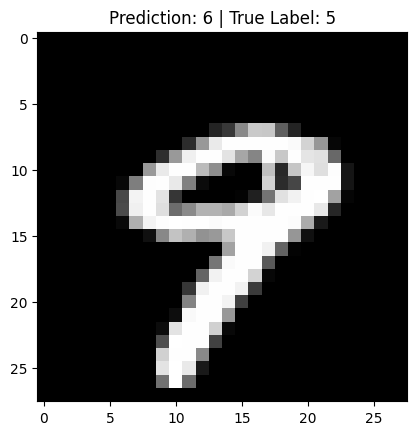

In [45]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(misclassified_image_2d, cmap='gray')

# Add a title to the plot to show the prediction and the true label
plt.title(f"Prediction: {predicted_label} | True Label: {true_label}")
plt.show()